# The Logistic Equation: A Simple Chaotic System

The logistic equation is a simple example of a *chaotic system*. It was first studied computationally by the [theoretical population biologist Robert May](https://www.nature.com/articles/261459a0) in the late 1960's to examine population dynamics.

# $x_{new} = k \cdot x_{old} (1 - x_{old})$

This formula takes a number $x$, which can be any number between 0 and 1, and changes it into a new value. You can think of $x$ as a normalized population size. The new value of $x$ can then be fed again into the formula, and so on. This is called an iterative process.

$k$ represents the growth rate and is a number between 0 and 4 - we call it "a parameter". It is kept constant while the iterative process is run. It turns out that whatever the initial value of $x$, after some 10s or 100s of iterations, the values of $x$ settle into a definite pattern. This pattern can be constant, periodic or *chaotic*, depending on the value of $k$.

Values of $k$ smaller than 3 give a constant value. For values greater than 3, a period doubling starts with a second bifurcation at 3.5, chaos shortly afterwards.

Let's integrate the logistic equation for different growth rates (k) and different initial conditions (xic) and see what happens.

In [9]:
# import packages
import numpy as np
from matplotlib import pyplot as plt

# different growth rates (k) and initial conditions (xic)
k = [1.5,3.2,3.67,3.9,3.999,5]
xic = [0.49,0.5,0.51,0.52]

We will loop over the different values of `k` and `xic` to create an array of results.

In [10]:
# Compute Logistic Equation for 100 iterations
it = 100

# Initialize x as a function of iterations, the length of k and the length of xic
x = np.zeros((it,len(k),len(xic)))

# Loop over xic
for l in range(len(xic)):
    # Loop over k
    for j in range(len(k)):
        i = 0
        while i < it:
            #  Get things started with the initial condition, xic
            if i == 0:
                xold = xic[l]
                xnew = k[j] * xold *(1.0 - xold)
                x[i,j,l] = xnew
                xold = xnew
                i +=1
            else:
                xnew = k[j] * xold *(1.0 - xold)
                x[i,j,l] = xnew
                xold = xnew
                i +=1

Now, let's plot the results: we should have 100 values for each permutation of `k` and `xic` because we iterated our model 100 times.

In the first plot below, I have plotted the results for the first four values of `k`.

In the second plot below, I have plotted the results for each `xic` for a single value of `k`.

Note that I have commented out some of the plotting lines. Run the plotting cell and then gradually add the new curve one-by-one by uncommenting the plotting line. 

* What patterns emerge?
* Add the additional values for `k` in the first plot, what do you see?
* What happens if you change the value for `k` in the second plot?


Text(0.5, 1.0, '(b) Chaotic Regime of the Logistic Equation with Different ICs (k = 3.67)')

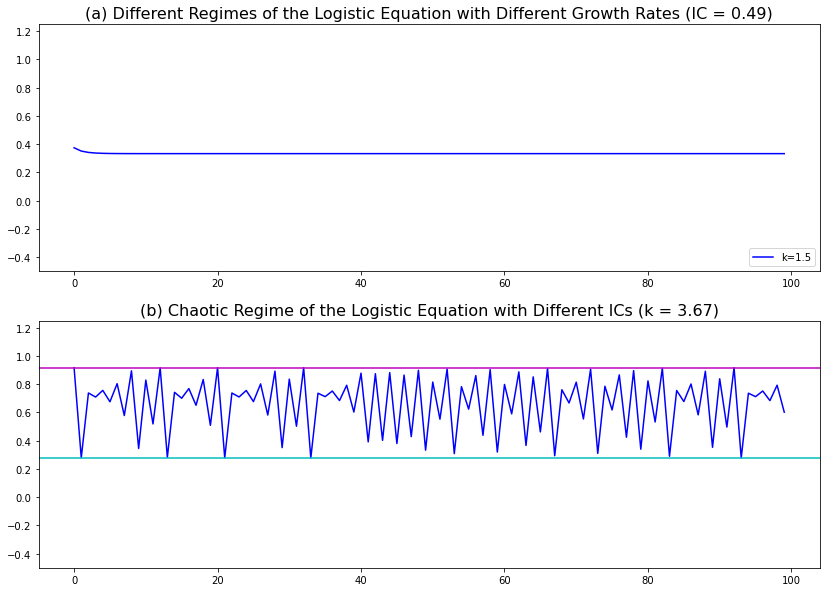

In [11]:
# Plot the results (xnew) as a function of iteration
plt.figure(figsize = (14,10))

# sensitivity to the growth rate, k
plt.subplot(2,1,1)
xici = 0 # just choose one initial value
plt.plot(x[:,0,xici],'b',label='k=1.5')
#plt.plot(x[:,1,xici],'g',label='k=3.2')
#plt.plot(x[:,2,xici],'r',label='k=3.6')
#plt.plot(x[:,3,xici],'k',label='k=3.9')

# add the last two k values to the plot

plt.ylim(-0.5,1.25)
plt.title('(a) Different Regimes of the Logistic Equation with Different Growth Rates (IC = '+str(xic[xici])+')',fontsize=16)
plt.legend(loc = "lower right")

# sensitivity to the initial condition, xic
plt.subplot(2,1,2)
ki = 2 # just choose one K value
plt.plot(x[:,ki,0],'b')
#plt.plot(x[:,ki,1],'g')
#plt.plot(x[:,ki,2],'r')
#plt.plot(x[:,ki,3],'k')
plt.ylim(-0.5,1.25)

# highlight the bounded nature of the solutions
bc_max = np.max(x[:,ki,0])
bc_min = np.min(x[:,ki,0])
plt.axhline(bc_max,color='m')
plt.axhline(bc_min,color='c')
plt.title('(b) Chaotic Regime of the Logistic Equation with Different ICs (k = '+str(k[ki])+')',fontsize=16)
